In [62]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
import time
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [63]:
os.getcwd()

'C:\\Users\\monst\\Desktop\\SMT-PRJ\\Hynix_SSL (1)\\DB_make\\data_sample'

In [64]:
os.listdir()

['.ipynb_checkpoints',
 'DBSCAN.ipynb',
 'feats.tsv',
 'labels.tsv',
 'labels_no.tsv',
 'test_labels.tsv',
 'tsne_x32.tsv',
 'tsne_y32.tsv']

In [65]:
feat_folder = 'C:\\Users\\monst\\Desktop\\SMT-PRJ\\Hynix_SSL (1)\\DB_make\\data_sample\\'

In [68]:
feats = pd.read_csv(feat_folder+'feats.tsv', sep='\t', header=None)
labels = pd.read_csv(feat_folder+'labels.tsv', sep='\t', header=None)
test_labels = pd.read_csv(feat_folder+'test_labels.tsv', sep='\t', header=None)
labels_no =pd.read_csv(feat_folder+'labels_no.tsv', sep='\t', header=None)

In [67]:
#labels_no = [np.argmax(np.array(labels.iloc[i,:])) for i in range(len(labels))]
# np.savetxt('labels_no.tsv',labels_no,delimiter='\t',)

In [7]:
# train 2071개의 label을 불러옴
import h5py
filename = 'C:\\Users\\monst\\Desktop\\SMT-PRJ\\Hynix_SSL (1)\\data\\32x32_seed0.h5py'

In [8]:
with h5py.File(filename, 'r') as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

Keys: <KeysViewHDF5 ['f_test', 'f_train', 'x_test', 'x_train', 'y_test', 'y_train']>


In [9]:
hf = h5py.File(filename, 'r')

In [10]:
#이미지랑 레이블끌고오기
x_train_img = hf.get('x_train')
y_train_label = hf.get('y_train')

x_test_img = hf.get('x_test')
y_test_label = hf.get('y_test')

train_fname = hf.get('f_train')
test_fname = hf.get('f_test')

In [30]:
np.array(train_fname) #그냥 한번 봤다.

array(['Burr', 'Burr', 'Burr', ...,
       'C:\\Users\\2052662\\Desktop\\ys_aoi_data\\AOI_Unlabel\\1,R314734912CK0021905231615,C2,5,3,Missing.png',
       'C:\\Users\\2052662\\Desktop\\ys_aoi_data\\AOI_Unlabel\\1,R314734912CK0021905231615,C2,5,4,Missing.png',
       'C:\\Users\\2052662\\Desktop\\ys_aoi_data\\AOI_Unlabel\\1,R314734912CK0021905231615,C2,5,5,Missing.png'],
      dtype=object)

In [11]:
feats

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.0910,0.6236,0.4948,0.1577,0.8080,0.2376,0.4898,0.2578,0.5071,0.0493,...,-0.0813,0.5266,1.3228,-0.0994,0.6791,-0.0753,-0.0651,-0.0345,-0.0738,-0.0701
1,0.0966,-0.0359,0.2825,0.0350,0.6350,0.0556,0.1133,0.1836,0.2168,0.0578,...,-0.0807,0.3503,0.7100,-0.0691,0.1413,0.2636,-0.0651,0.0451,-0.0738,0.5672
2,0.0508,-0.0669,0.0970,0.1290,0.7556,-0.0841,0.0406,0.0985,0.2095,0.2612,...,-0.0805,0.4062,0.5673,-0.0754,0.3377,0.2004,-0.0660,0.2651,-0.0738,0.2092
3,0.2412,-0.1141,0.2518,0.2767,0.5423,-0.0337,-0.0429,0.3184,0.2136,0.0630,...,-0.0806,0.2930,0.0069,-0.0674,-0.0331,0.4423,-0.0660,-0.0086,-0.0738,0.7570
4,0.2353,-0.0870,-0.0391,0.0253,0.7202,0.2818,0.0960,0.3795,0.3146,0.0700,...,-0.0806,0.0923,0.6463,-0.0800,-0.0378,0.3538,-0.0652,-0.1053,-0.0738,0.1653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107933,0.1820,1.0161,0.5551,0.1745,0.8136,0.2644,0.5040,0.2477,0.4642,0.0102,...,-0.0813,0.5613,1.3209,-0.1099,0.7053,-0.0881,-0.0651,-0.0487,-0.0738,-0.0855
107934,-0.0118,-0.1334,0.0399,0.3022,0.2458,0.1961,0.0602,-0.0567,0.1073,0.1617,...,-0.0807,-0.0089,0.1634,-0.1131,1.2592,-0.0682,-0.0653,-0.0793,-0.0737,-0.0948
107935,0.1884,-0.1198,0.2423,0.2087,0.6599,-0.0412,-0.0398,0.3366,0.1806,0.0497,...,-0.0806,0.3065,0.0166,-0.0647,-0.0138,0.3610,-0.0660,-0.0525,-0.0738,0.6634
107936,0.0632,-0.0165,0.0810,0.1730,0.9172,-0.0585,0.0217,0.1363,0.3753,0.3798,...,-0.0803,0.3665,0.4451,-0.0825,0.1434,0.1843,-0.0662,0.3180,-0.0738,0.2215


In [12]:
# labels

In [70]:
labels_no= labels_no.astype(int)
labels_no

,0
0,8
1,11
2,11
3,11
4,5
...,...
107933,8
107934,8
107935,11
107936,11


In [14]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(feats)

xs = transformed[:,0]
ys = transformed[:,1]

KeyboardInterrupt: 

In [21]:
xs = pd.read_csv('tsne_x32.tsv',delimiter='\t',header=None)
ys = pd.read_csv('tsne_y32.tsv',delimiter='\t',header=None)

In [72]:
labels_no[0][1]

11

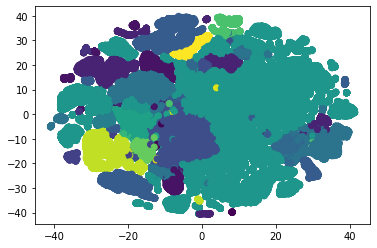

In [24]:
plt.scatter(xs,ys,c=labels_no)

plt.show()

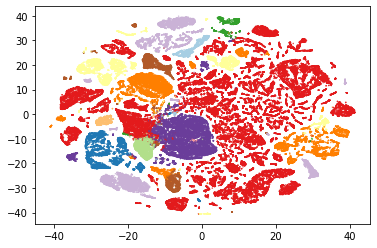

In [25]:
plt.scatter(xs,ys,c=labels_no, s=0.2,cmap='Paired_r')
plt.show()

In [73]:
labels_no[0][1]


11

In [74]:
import matplotlib._color_data as mcd
cn = [mcd.CSS4_COLORS[list(mcd.CSS4_COLORS.keys())[labels_no[0][i]]] for i in range(len(labels_no[0]))]

In [ ]:
for i in range(len(xs)): # 0부터 정수
    plt.text(xs[0][i], ys[0][i], str(labels_no[0][i]), # x, y , 그룹
             color=cn, # 색상
             fontdict={'weight': 'bold', 'size':20}) # font
    
#plt.figure(figsize=(200, 200))
plt.xlim(xs.min(), xs.max()) # 최소, 최대
plt.ylim(ys.min(), ys.max()) # 최소, 최대
plt.xlabel('t-SNE 특성0') # x축 이름
plt.ylabel('t-SNE 특성1') # y축 이름

plt.show() # 그래프 출력

In [80]:
xs[0][0]

-12.097694396972656

In [60]:
for i in range(len(xs)): # 0부터  digits.data까지 정수

    plt.text(xs[i], ys[i], str(labels_no[i]), # x, y , 그룹

             color=cn, # 색상

             fontdict={'weight': 'bold', 'size':15}) # font
    
    
plt.figure(figsize=(200, 200))

plt.xlim(xs.min(), xs.max()) # 최소, 최대

plt.ylim(ys.min(), ys.max()) # 최소, 최대

plt.xlabel('t-SNE 특성0') # x축 이름

plt.ylabel('t-SNE 특성1') # y축 이름

plt.show() # 그래프 출력

KeyError: 1

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000226F66FD288> (for post_execute):


TypeError: cannot convert the series to <class 'float'>

TypeError: cannot convert the series to <class 'float'>

<Figure size 432x288 with 1 Axes>

In [51]:
xs

array([-12.097694 ,  -5.776063 ,   5.2763243, ...,  25.343182 ,
        16.744278 ,   5.237329 ], dtype=float32)

In [35]:
#np.savetxt('tsne_x32.tsv', xs, delimiter='\t')

In [36]:
#np.savetxt('tsne_y32.tsv', ys, delimiter='\t')

In [39]:
plt.scatter?

In [37]:
TSNE?

In [ ]:
### TSNE모델에는 transform 메소드가 없고 fit_transform만 있음



# library import

from sklearn.manifold import TSNE



# t-SNE 모델 생성 및 학습

tsne = TSNE(random_state=0)

digits_tsne = tsne.fit_transform(digits.data)



# 시각화

for i in range(len(digits.data)): # 0부터  digits.data까지 정수

    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), # x, y , 그룹

             color=colors[digits.target[i]], # 색상

             fontdict={'weight': 'bold', 'size':9}) # font

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대

plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대

plt.xlabel('t-SNE 특성0') # x축 이름

plt.ylabel('t-SNE 특성1') # y축 이름

plt.show() # 그래프 출력

In [48]:
pred_label = [np.argmax(labels.iloc[i]) for i in labels]

In [46]:
labels.iloc[0].shape

(22,)